### Training Dataset Processing

In [153]:
import pandas as pd

In [154]:
training_df = pd.read_csv("..\\train_data.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [155]:
training_df.shape

(982644, 9)

In [156]:
training_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [157]:
training_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

### EDA

#### Data Description

In [158]:
training_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000
mean,558.444843,3.998282,5760.843202,632.770227,0.828585,0.380183,0.171928
std,321.909907,2.000138,3857.573443,465.401378,0.376871,0.485432,0.377318
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3705.000000,403.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5731.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7847.000000,838.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


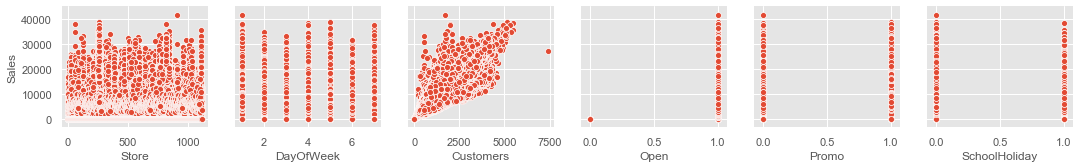

In [159]:
import seaborn as sns
# sns.pairplot(data=training_df[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday']], hue='Sales')
sns.pairplot(training_df, x_vars = ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday'], y_vars = ['Sales'])

In [160]:
training_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [161]:
training_df['SchoolHoliday'].unique()

array([0, 1], dtype=int64)

In [162]:
training_df['Promo'].unique()

array([1, 0], dtype=int64)

In [163]:
training_df['Open'].unique()

array([1, 0], dtype=int64)

In [164]:
training_df['DayOfWeek'].unique()

array([2, 1, 7, 6, 5, 4, 3], dtype=int64)

#### Q.2. One-hot Encoding

In [165]:
from sklearn import preprocessing
from copy import deepcopy

training_df_encode = deepcopy(training_df)
training_df_encode['StateHoliday'] = training_df_encode['StateHoliday'].astype(str)
le = preprocessing.LabelEncoder()
training_df_encode['StateHoliday'] = le.fit_transform(training_df_encode['StateHoliday'].fillna(""))
training_df_encode['StateHoliday'] = training_df_encode['StateHoliday'].astype(int)

StateHoliday_LE_Map = dict(zip(le.classes_, le.transform(le.classes_)))
StateHoliday_LE_Map_reverse = dict(zip(le.transform(le.classes_), le.classes_))

In [166]:
training_df_encode['StateHoliday'].unique()

array([0, 1, 2, 3])

#### Q.3. Correlation of All Features with Target Variable "Sales" 

##### Corrlation for All Stores Single Model

In [167]:
training_df_encode = training_df_encode[['Store', 'Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Sales']]
training_df_encode.corr()['Sales']

Store            0.005338
Customers        0.895700
Open             0.679248
Promo            0.451383
StateHoliday    -0.232119
SchoolHoliday    0.076141
Sales            1.000000
Name: Sales, dtype: float64

##### Corrlation for Each Store Model

In [168]:
training_df_encode_store_1 = training_df_encode[training_df_encode['Store'] == 1]
training_df_encode_store_1 = training_df_encode_store_1[['Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Sales']]
training_df_encode_store_1.corr()['Sales']

Customers        0.984514
Open             0.888938
Promo            0.468278
StateHoliday    -0.305249
SchoolHoliday   -0.001038
Sales            1.000000
Name: Sales, dtype: float64

### Testing Data Processing

In [169]:
test_df = pd.read_csv("..\\test_data_hidden.csv")

#### Q.2. (Reverse Part) Reverse Mapping of One hot Encoding

In [170]:
test_df['StateHoliday'] = test_df['StateHoliday'].map(StateHoliday_LE_Map_reverse)

In [171]:
test_df.shape

(34565, 9)

#### Q.4. Linear Regression Model

##### Training The Model

In [36]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def model_training(X_train, y_train):
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    return regr

##### Testing The Model

In [37]:
def model_predict(X_test, regr):
    y_pred = regr.predict(X_test)
    return list(y_pred)

##### Accuracy Metrics

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_performance(y_test, y_pred, regr):
        
#     try:
    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # The mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    # The coefficient of determination: 1 is perfect prediction

    r2 = r2_score(y_test, y_pred)
        
    
    
    return mse, mae, r2

##### Training Model (Single For All Stores / Seperate Model for Each Store)

In [39]:
def model_for_all_or_each_store(training_df, test_df, store_no):
    
    if str(store_no).lower() == 'all':
        print ("training_df_all shape : ", training_df.shape)
        # Splitting Training Data
        X_train = training_df[['Store', 'Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
        y_train = training_df['Sales']

        # Splitting Testing Data
        X_test = test_df[['Store', 'Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
        y_test = list(test_df['Sales'])
        
         # Model Training
        regr = model_training(X_train, y_train)

        # Prediction
        y_pred = model_predict(X_test, regr)

        # Performance Measurement
        mse, mae, r2 = model_performance(y_test, y_pred, regr)
        
        return y_pred, mse, mae, r2
        
    else:
        training_df_store = training_df[training_df['Store'] == store_no]
        print ("training_df_store shape : ", training_df_store.shape)
        
        
        test_df = test_df[test_df['Store'] == store_no]
        
        # Splitting Training Data
        X_train = training_df_store[['Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
        y_train = training_df_store['Sales']

        # Splitting Testing Data
        X_test = test_df[['Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
        y_test = list(test_df['Sales'])
        
        # Model Training
        regr = model_training(X_train, y_train)

        # Prediction
        y_pred = model_predict(X_test, regr)

        # Performance Measurement
        mse, mae, r2 = model_performance(y_test, y_pred, regr)
        
        return y_pred, mse, mae, r2
   
    
    
    

##### Q.4.a. Training & Testing a Single Model for All Stores

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred, mse, mae, r2 = model_for_all_or_each_store(training_df_encode, test_df, 'all')
# Performance Measurement
print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)

training_df_all shape :  (982644, 7)
Mean squared error: 2359037.33
Mean Absolute Error: 1018.03
R-Square Score: 0.82


##### Q.4.b. Training & Testing Seperate Model for each Store

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred, mse, mae, r2 = model_for_all_or_each_store(training_df_encode, test_df, 1)
print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)

training_df_store shape :  (911, 7)
Mean squared error: 55573.22
Mean Absolute Error: 184.26
R-Square Score: 0.98


#### Q.5 Use Non-Linear Regressors like Random Forest or other Tree-based Regressors

##### Random Forest Regressor

##### Train The Model

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def model_training(X_train, y_train):
    regr = RandomForestRegressor(max_depth=25, random_state=42)
    regr.fit(X_train, y_train)
    return regr

##### Test The Model

In [43]:
def model_predict(X_test, regr):
    y_pred = regr.predict(X_test)
    return list(y_pred)

##### Q.5.a. Training & Testing a Single Model for All Stores using "Random Forest Regressor"

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred, mse, mae, r2 = model_for_all_or_each_store(training_df_encode, test_df, 'all')
print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)

training_df_all shape :  (982644, 7)
Mean squared error: 520161.17
Mean Absolute Error: 474.26
R-Square Score: 0.96


##### Q.5.b. Training & Testing a Single Model for Each Stores using "Random Forest Regressor"¶

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred, mse, mae, r2 = model_for_all_or_each_store(training_df_encode, test_df, 1)
print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)

training_df_store shape :  (911, 7)
Mean squared error: 96922.04
Mean Absolute Error: 241.16
R-Square Score: 0.96


#### Q.6. Train a Time-series model on the data taking time as the only feature. This will be a store-level training.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

##### Training Data Process

In [64]:
df = pd.read_csv('..\\train_data.csv',index_col='Date',parse_dates=True)

df_sale_train = df[df['Store'] == 1]
df_sale_train = df_sale_train[['Sales']]
df_sale_train.index=pd.to_datetime(df_sale_train.index)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
df_sale_train.head()

,Sales
Date,
2015-06-30,5735
2015-06-29,5197
2015-06-28,0
2015-06-27,4019
2015-06-26,3317


##### Seasonal Decomposition

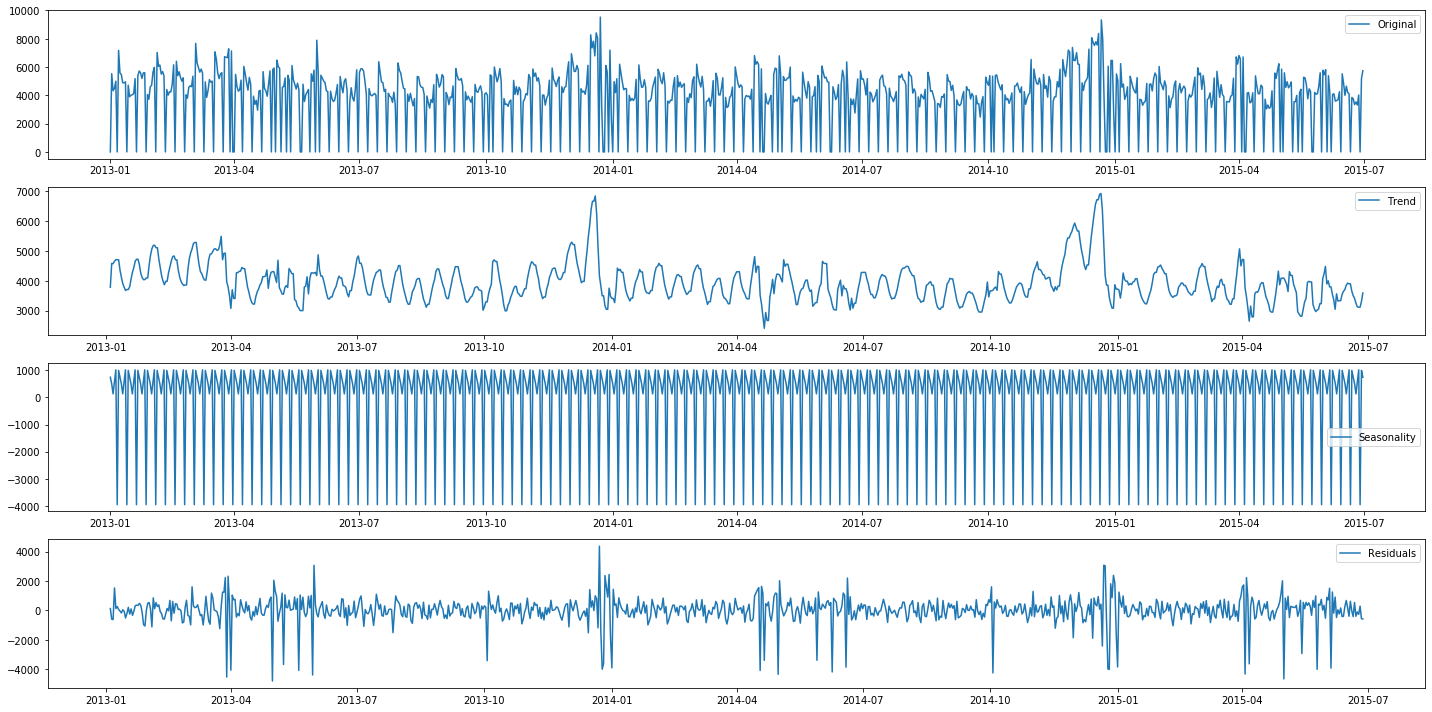

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_sale_train)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df_sale_train, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

##### Testing Data Process

In [72]:
test_df_ = pd.read_csv("..\\test_data_hidden.csv", index_col='Date',parse_dates=True)

df_sale_test = test_df_[test_df_['Store'] == 1]
df_sale_test = df_sale_test[['Sales']]
df_sale_test.index=pd.to_datetime(df_sale_test.index)

##### ARIMA Model

In [73]:
from pmdarima import auto_arima

auto_arima(df_sale_train['Sales'], seasonal=True, m=7).summary()

C:\Users\deyat\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\deyat\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\deyat\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\deyat\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\deyat\AppData\Roamin

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                  911
Model:             SARIMAX(2, 0, 0, 7)   Log Likelihood               -7925.966
Date:                 Thu, 26 Nov 2020   AIC                          15859.932
Time:                         00:35:07   BIC                          15879.191
Sample:                              0   HQIC                         15867.285
                                 - 911                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1653.0978     58.670     28.176      0.000    1538.107    1768.089
ar.S.L7        0.1974      0.017     11.553      0.000       0.164       0.231
ar.S.L14       0.4225      0.018     23.186      0.000       0.387       0.458
sigma2       1.35e+06   3.12e+04     43.268      0.000    1.29e+06    1.41e+06
===================================================================================
Ljung-Box (Q):                      271.64   Jarque-Bera (JB):               211.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.20
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

model = ARIMA(df_sale_train['Sales'],order=(2,0,2))
results = model.fit()
results.summary()

C:\Users\deyat\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
C:\Users\deyat\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  911
Model:                     ARMA(2, 2)   Log Likelihood               -8098.227
Method:                       css-mle   S.D. of innovations           1751.462
Date:                Thu, 26 Nov 2020   AIC                          16208.455
Time:                        00:35:07   BIC                          16237.342
Sample:                             0   HQIC                         16219.483
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3946.8582     56.288     70.119      0.000    3836.535    4057.181
ar.L1.Sales    -0.4403      0.004   -123.030      0.000      -0.447      -0.433
ar.L2.Sales    -0.9950      0.003   -311.681      0.000      -1.001      -0.989
ma.L1.Sales     0.3854      0.012     31.572      0.000       0.361       0.409
ma.L2.Sales     0.9769      0.007    140.679      0.000       0.963       0.991
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2213           -0.9778j            1.0025           -0.2854
AR.2           -0.2213           +0.9778j            1.0025            0.2854
MA.1           -0.1972           -0.9923j            1.0118           -0.2812
MA.2           -0.1972           +0.9923j            1.0118            0.2812
-----------------------------------------------------------------------------
"""

In [75]:
# Obtain predicted values
start=len(df_sale_train['Sales'])
end=len(df_sale_train['Sales'])+len(df_sale_test['Sales'])-1

In [76]:
predictions = results.predict(start=start, end=end, dynamic=False).rename('ARIMA(1,1,1) Predictions')

df_sale_test['ARIMA_Forecasted_Sales'] = predictions.values
df_sale_test['ARIMA_Forecasted_Sales'] = df_sale_test['ARIMA_Forecasted_Sales'].astype(int)
df_sale_test

C:\Users\deyat\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,Sales,ARIMA_Forecasted_Sales
Date,,
2015-07-31,5263,4567
2015-07-30,5020,2622
2015-07-29,4782,3912
2015-07-28,5011,5280
2015-07-27,6102,3393
2015-07-26,0,2863
2015-07-25,4364,4974
2015-07-24,3706,4572
2015-07-23,3769,2649


#### Q.7. Dimensional Reduction techniques like, PCA and Tree’s Hyperparameter Tuning will be required. Cross-validate to find the best parameters. Infer the performance of both the models.

##### PCA for Selecting Top Components

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = training_df_encode[['Store', 'Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
y_train = training_df_encode['Sales']

X_test = test_df[['Store', 'Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
y_test = test_df['Sales']
    
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

##### Selected Important Features using PCA

In [49]:
import numpy as np
# number of components
n_pcs= pca.components_.shape[0]
print ("Number of Principal Components : ", n_pcs)

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
print ("most_important_feature_index : ", most_important)

initial_feature_names = ['Store', 'Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print ("most_important_names : ", most_important_names)

Number of Principal Components :  2
most_important_feature_index :  [1, 0]
most_important_names :  ['Customers', 'Store']


##### Hyperparameter Tuning using Cross Validation

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
def params_tuning(model,X_train,y_train,X_test,y_test,param_grid,clf=False,conf=False):
    """Tune parameters of the model using a grid search, this function just makes the job easier."""
    gs=GridSearchCV(model,param_grid=param_grid,cv=2)
    print ("GS Modelling Done")
    gs.fit(X_train,y_train)
    print ("GS Fitting Done")
    predicted = gs.predict(X_test)
    print ("GS Prediction Done")
    print (gs.best_params_)
    mse = mae = r2 = 0
    mse = mean_squared_error(y_test, predicted)
    mae = mean_absolute_error(y_test, predicted)
    r2 = r2_score(y_test, rfpred)
    print('Mean squared error: %.2f'%mse )
    print('Mean Absolute Error: %.2f'%mae)
    print('R-Square Score: %.2f'%r2)


rf = RandomForestRegressor() #Random Forest
rf.fit(X_train,y_train)
rfpred=rf.predict(X_test)

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)


rfp = dict(n_estimators=np.arange(5,25,10), max_depth= max_depth)

mse = mae = r2 = 0
mse = mean_squared_error(y_test, rfpred)
mae = mean_absolute_error(y_test, rfpred)
r2 = r2_score(y_test, rfpred)

print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)
params_tuning(rf,X_train,y_train,X_test,y_test,rfp)



Mean squared error: 619454.24
Mean Absolute Error: 521.33
R-Square Score: 0.95
GS Modelling Done
GS Fitting Done
GS Prediction Done
{'max_depth': 60, 'n_estimators': 15}
Mean squared error: 640245.77
Mean Absolute Error: 528.10
R-Square Score: 0.95


##### Random Forest Regssor using Selected PCA Components

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

regr = RandomForestRegressor(max_depth=25, random_state=42)
regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=25, random_state=42)

In [54]:
y_pred = regr.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mae = r2 = 0
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, rfpred)
# Performance Measurement
print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)

Mean squared error: 662907.89
Mean Absolute Error: 539.75
R-Square Score: 0.95


#### Q.8. Cluster stores using sales and customer visits as features. Find out how many clusters or groups are possible. Also visualize the results.

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Plot styling

In [262]:
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [263]:
training_df = pd.read_csv("..\\train_data.csv")

from sklearn import preprocessing
from copy import deepcopy

training_df_encode = deepcopy(training_df)
training_df_encode['StateHoliday'] = training_df_encode['StateHoliday'].astype(str)
le = preprocessing.LabelEncoder()
training_df_encode['StateHoliday'] = le.fit_transform(training_df_encode['StateHoliday'].fillna(""))
training_df_encode['StateHoliday'] = training_df_encode['StateHoliday'].astype(int)

StateHoliday_LE_Map = dict(zip(le.classes_, le.transform(le.classes_)))
StateHoliday_LE_Map_reverse = dict(zip(le.transform(le.classes_), le.classes_))



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [264]:
training_df_encode.shape

(982644, 9)

In [265]:
test_df = pd.read_csv("..\\test_data_hidden.csv")
test_df['StateHoliday'] = test_df['StateHoliday'].map(StateHoliday_LE_Map_reverse)

In [266]:
test_df.shape

(34565, 9)

In [267]:
training_df_encode = training_df_encode.append(test_df)
training_df_encode.shape

(1017209, 9)

In [268]:
df_sale_train = training_df_encode[['Sales', 'Customers']]

In [269]:
df_sale_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0


##### Visualizing the data - displot

Text(0.5, 0, 'sales / customers')

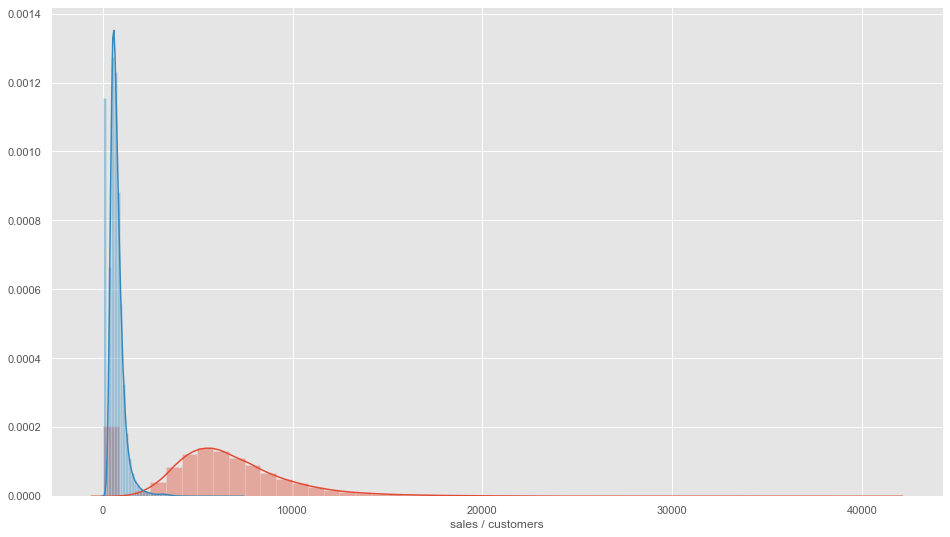

In [226]:
plot_sales = sns.distplot(df_sale_train["Sales"])
plot_customers = sns.distplot(df_sale_train["Customers"])
plt.xlabel('sales / customers')

##### Violin plot of Income and Spend

[(0, 420)]

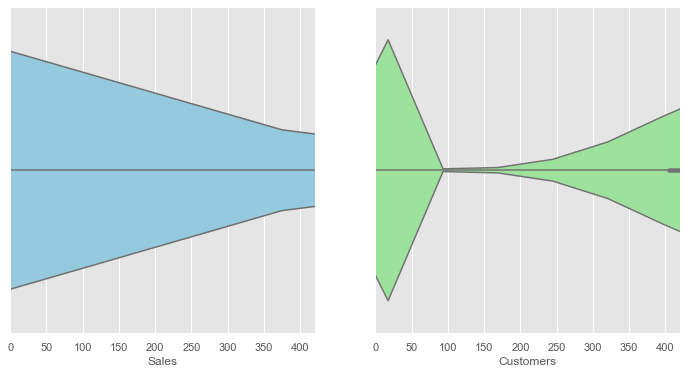

In [227]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=df_sale_train, x='Sales', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=df_sale_train, x='Customers',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

##### Using the elbow method to find the optimum number of clusters

In [228]:
X = df_sale_train.iloc[: , :].values

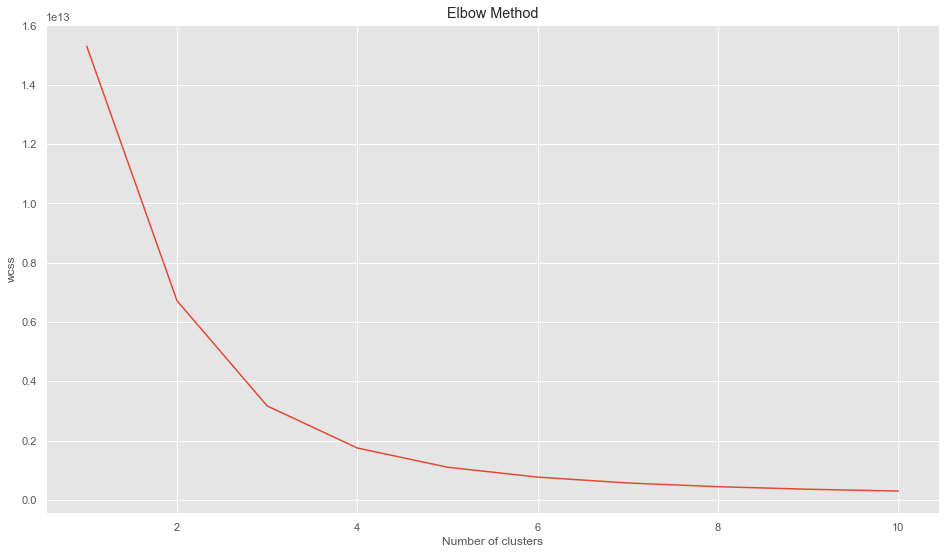

In [229]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

##### Fitting the k-means to the dataset with k=4

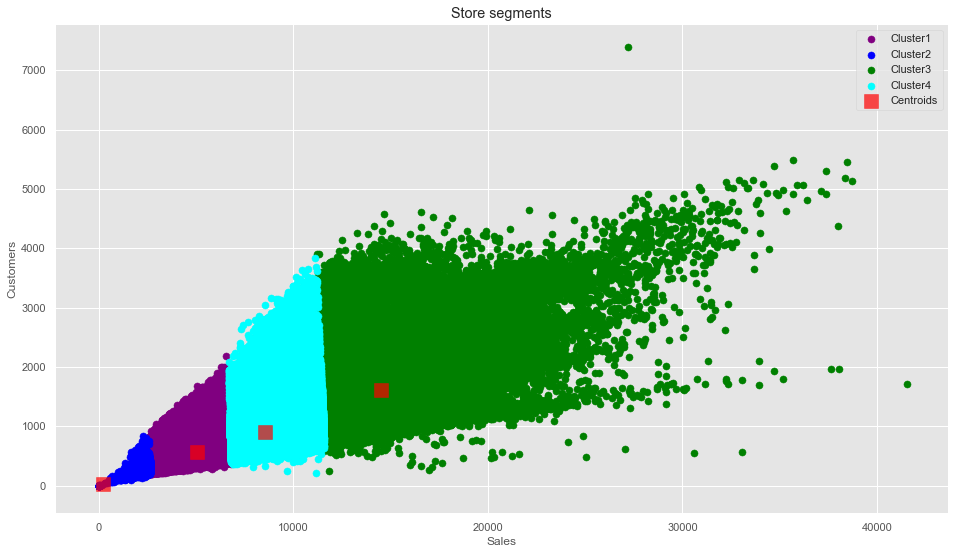

In [270]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Store segments')
plt.xlabel('Sales')
plt.ylabel('Customers')
plt.legend()
plt.show()

##### Q.9. Is it possible to have separate prediction models for each cluster? Compare results with the previous models.

In [271]:
km4.labels_

array([0, 3, 2, ..., 3, 2, 3])

In [272]:
len(km4.labels_)

1017209

In [273]:
training_df_encode['Cluster_Label'] = list(km4.labels_)

In [274]:
training_df_encode.shape

(1017209, 10)

In [275]:
training_df_encode.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Cluster_Label
0,1,2,2015-06-30,5735,568,1,1,0,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0,3
2,3,2,2015-06-30,13261,1072,1,1,0,1,2
3,4,2,2015-06-30,13106,1488,1,1,0,0,2
4,5,2,2015-06-30,6635,645,1,1,0,0,0


In [276]:
training_df_encode['Cluster_Label'].value_counts()

0    454575
3    307151
1    191377
2     64106
Name: Cluster_Label, dtype: int64

##### Random Forest Regression Model

In [277]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def model_training(X_train, y_train):
    regr = RandomForestRegressor(max_depth=25, random_state=42)
    regr.fit(X_train, y_train)
    return regr

In [278]:
def model_predict(X_test, regr):
    y_pred = regr.predict(X_test)
    return list(y_pred)

In [279]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_performance(y_test, y_pred, mse, mae, r2, regr):
        
#     try:
    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # The mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    # The coefficient of determination: 1 is perfect prediction
    r2 = r2_score(y_test, y_pred)
    
    return mse, mae, r2

In [280]:
def model_for_all_or_each_store(training_df, test_df):
        # Splitting Training Data
        X_train = training_df[['Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
        y_train = list(training_df['Sales'])
#         print ("y_train : ", y_train)

        # Splitting Testing Data
        X_test = test_df[['Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
        y_test = list(test_df['Sales'])
        
        
        # Model Training
        regr = model_training(X_train, y_train)

        # Prediction
        y_pred = model_predict(X_test, regr)

        # Performance Measurement
        mse = mae = r2 = 0
        mse, mae, r2 = model_performance(y_test, y_pred, mse, mae, r2, regr)
        
        return y_pred, mse, mae, r2

###### Train - Test Data Splitting & Run The Model


In [281]:
train_set, test_set = training_df_encode[0:-34565].values, training_df_encode[-34565:].values

In [282]:
train_set

array([[1, 2, '2015-06-30', ..., 0, 0, 0],
       [2, 2, '2015-06-30', ..., 0, 0, 3],
       [3, 2, '2015-06-30', ..., 0, 1, 2],
       ...,
       [1113, 2, '2013-01-01', ..., 1, 1, 1],
       [1114, 2, '2013-01-01', ..., 1, 1, 1],
       [1115, 2, '2013-01-01', ..., 1, 1, 1]], dtype=object)

In [295]:
train_df_cluster = pd.DataFrame(data=train_set, columns=["Store", "DayOfWeek", "Date", "Sales", "Customers", "Open", "Promo", "StateHoliday", "SchoolHoliday", "Cluster_Label"])
train_df_cluster = train_df_cluster.reset_index(drop=True)

test_df_cluster = pd.DataFrame(data=test_set, columns=["Store", "DayOfWeek", "Date", "Sales", "Customers", "Open", "Promo", "StateHoliday", "SchoolHoliday", "Cluster_Label"])
test_df_cluster = test_df_cluster.reset_index(drop=True)

In [296]:
train_df_cluster.shape

(982644, 10)

In [297]:
test_df_cluster.shape

(34565, 10)

In [298]:
train_df_cluster = train_df_cluster[train_df_cluster['Cluster_Label'].astype(int) == 0]
test_df_cluster = test_df_cluster[test_df_cluster['Cluster_Label'].astype(int) == 0]

In [299]:
print(train_df_cluster.shape)
print(test_df_cluster.shape)

(438832, 10)
(15743, 10)


##### For Cluster 0

In [300]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred, mse, mae, r2 = model_for_all_or_each_store(train_df_cluster, test_df_cluster)
print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)

Mean squared error: 588419.01
Mean Absolute Error: 626.45
R-Square Score: 0.45


##### For Cluster 1

In [294]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred, mse, mae, r2 = model_for_all_or_each_store(train_df_cluster, test_df_cluster)
print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)

Mean squared error: 5623.65
Mean Absolute Error: 20.15
R-Square Score: 0.99


##### For Cluster 2

In [288]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred, mse, mae, r2 = model_for_all_or_each_store(train_df_cluster, test_df_cluster)
print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)

Mean squared error: 6441010.20
Mean Absolute Error: 1714.45
R-Square Score: 0.26


###### For Cluster 3

In [257]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred, mse, mae, r2 = model_for_all_or_each_store(train_df_cluster, test_df_cluster)
print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)

Mean squared error: 1151354.45
Mean Absolute Error: 855.73
R-Square Score: 0.26
